In [1]:
from mab.agent import Simulation, ActionSelectorEnum, ActionSelectorFactory
import matplotlib.pyplot as plt
import numpy as np

In [2]:
nr_of_iterations = 100
nr_of_steps = 1000

all_averages = []
all_averages_optimistic_initial = []
all_averages_epsilon1 = []
all_averages_epsilon2 = []
all_averages_UCB = []

greedy_action_selector = ActionSelectorFactory.get_action_selector(ActionSelectorEnum.EPSILON_GREEDY, epsilon=0)
UCB_action_selector = ActionSelectorFactory.get_action_selector(ActionSelectorEnum.UPPER_CONFIDENCE_BOUND, c=2.0)
epsilon1_greedy_action_selector = ActionSelectorFactory.get_action_selector(ActionSelectorEnum.EPSILON_GREEDY, epsilon=0.1)
epsilon2_greedy_action_selector = ActionSelectorFactory.get_action_selector(ActionSelectorEnum.EPSILON_GREEDY, epsilon=0.01)


for run in range(nr_of_iterations):
    np.random.seed(run)
    
    # Simulation with greedy agent
    s = Simulation(10, 0, nr_of_steps, greedy_action_selector)
    averages = s.simulate()
    
    all_averages.append(averages)

    # Simulation with greedy agent, with optimistic initial value
    s = Simulation(10, 0, nr_of_steps, greedy_action_selector, 5.0)
    averages = s.simulate()
    
    all_averages_optimistic_initial.append(averages)

    # Simulation with epsilon-greedy with epsilon = 0.1
    s = Simulation(10, 0.1, nr_of_steps, epsilon1_greedy_action_selector)
    averages = s.simulate()
    
    all_averages_epsilon1.append(averages)

    # Simulation with epsilon-greedy with epsilon = 0.01
    s = Simulation(10, 0.01, nr_of_steps, epsilon2_greedy_action_selector)
    averages = s.simulate()
    
    all_averages_epsilon2.append(averages)

    # Simulation with greedy agent
    s = Simulation(10, 0, nr_of_steps, UCB_action_selector)
    averages = s.simulate()

    all_averages_UCB.append(averages)

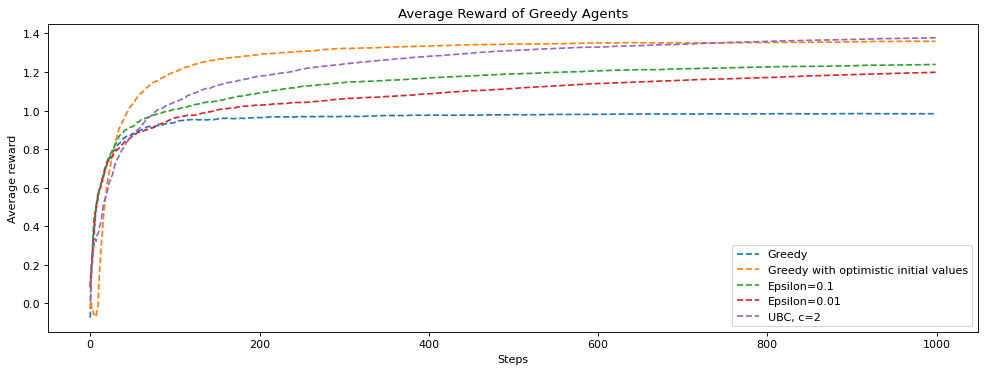

In [3]:
plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(np.mean(all_averages, axis=0), linestyle="--")
plt.plot(np.mean(all_averages_optimistic_initial, axis=0), linestyle="--")
plt.plot(np.mean(all_averages_epsilon1, axis=0), linestyle="--")
plt.plot(np.mean(all_averages_epsilon2, axis=0), linestyle="--")
plt.plot(np.mean(all_averages_UCB, axis=0), linestyle="--")
plt.legend(["Greedy", "Greedy with optimistic initial values", "Epsilon=0.1", "Epsilon=0.01", "UBC, c=2"])
plt.title("Average Reward of Greedy Agents")
plt.xlabel("Steps")
plt.ylabel("Average reward")
plt.show()